In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

## Generating Data

In [0]:
N = 1000
X = np.random.random((N,2))*6 - 3
Y = np.cos(2*X[:,0])+np.cos(3*X[:,1])

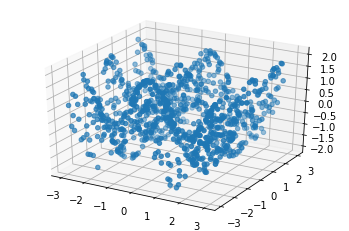

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

## Model

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(128,input_shape=(2,),activation='relu'),
                             tf.keras.layers.Dense(1)
                            ])

opt = tf.keras.optimizers.Adam(0.01)

model.compile(optimizer=opt,loss='mse')

In [7]:
model.fit(X,Y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9715
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9222
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9020
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9286
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8962
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8074
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7660
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7001
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6504
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6197
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5510
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5574
Epoch 13/100
32/32 [=================

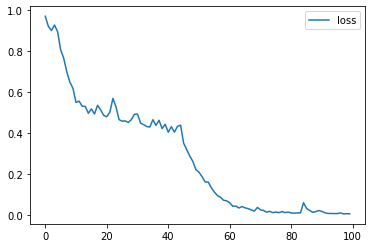

In [11]:
loss = pd.DataFrame(model.history.history)
plt.plot(loss,label='loss')
plt.legend()

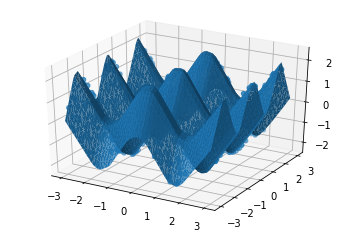

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

line = np.linspace(-3,3,50)
xx,yy = np.meshgrid(line,line)
Xgrid = np.vstack((xx.flatten(),yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat)
plt.show()